In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
data = pd.read_table('GSE18842_series_matrix.txt')

In [46]:
data

Samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM466947,11.07380,8.43162,5.90431,6.89847,3.45700,6.64642,4.16646,4.32352,9.98351,3.48147,...,12.3878,11.8568,13.7206,13.2905,7.25398,5.38737,5.98686,3.15295,3.56524,3.28915
GSM466948,9.72437,7.24537,6.45249,6.79966,3.50321,8.56320,4.39347,5.71206,10.39780,3.74574,...,12.3142,11.8131,13.8167,13.2799,7.30853,5.46010,6.02483,3.15488,3.38839,3.38120
GSM466949,10.98380,8.83493,9.06454,7.27515,3.51874,6.56581,4.04839,4.15926,7.97479,3.62597,...,12.3548,11.8430,13.8007,13.2876,7.11784,5.15274,5.56392,3.30065,3.42477,3.27475
GSM466950,9.60142,7.37471,7.24729,7.41908,3.32823,8.48082,4.22232,4.60090,9.06632,3.66771,...,12.5592,11.9620,13.8524,13.4153,7.84826,5.74115,6.54000,3.15469,3.42108,3.22572
GSM466951,9.83916,7.03120,7.45011,6.94433,3.18426,8.39239,4.75527,4.29695,10.88340,3.56704,...,12.6418,12.1572,13.9163,13.4266,8.63624,6.56671,7.42035,3.17574,3.38137,3.18758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM467033,9.77358,7.05820,9.91165,7.60571,3.36601,8.23259,4.13318,5.55462,9.69207,3.70619,...,12.2113,11.5309,13.7004,13.2594,7.18575,5.47947,5.97264,3.25299,3.46740,3.28680
GSM467034,11.10720,8.60706,6.55667,7.42853,3.81681,7.74160,4.08539,5.28836,9.14966,4.40524,...,12.0857,11.5028,13.6312,13.2869,7.25673,5.38997,5.97378,3.23150,3.51583,3.11404
GSM467035,9.97502,7.10485,8.18930,7.14897,3.36443,8.26762,4.53740,5.27321,9.32301,3.65987,...,12.2598,11.6267,13.7684,13.2156,7.58862,5.64609,6.34489,3.14948,3.43863,3.35475
GSM467036,10.73090,7.32899,6.33403,8.15384,3.52670,6.66091,4.18010,4.66102,8.16220,3.57678,...,12.3170,11.7384,13.7776,13.3604,7.81477,5.93630,6.58522,3.19552,3.59413,3.08477


In [19]:
labels = pd.read_csv('labels_for_lung_cancer')

In [20]:
labels

,Sample_characteristics
0,sample type: tumor
1,sample type: control
2,sample type: tumor
3,sample type: control
4,sample type: tumor
...,...
86,sample type: control
87,sample type: tumor
88,sample type: control
89,sample type: tumor


In [22]:
data = data.set_index('ID_REF').rename_axis('Samples').T

In [23]:
data

Samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM466947,11.07380,8.43162,5.90431,6.89847,3.45700,6.64642,4.16646,4.32352,9.98351,3.48147,...,12.3878,11.8568,13.7206,13.2905,7.25398,5.38737,5.98686,3.15295,3.56524,3.28915
GSM466948,9.72437,7.24537,6.45249,6.79966,3.50321,8.56320,4.39347,5.71206,10.39780,3.74574,...,12.3142,11.8131,13.8167,13.2799,7.30853,5.46010,6.02483,3.15488,3.38839,3.38120
GSM466949,10.98380,8.83493,9.06454,7.27515,3.51874,6.56581,4.04839,4.15926,7.97479,3.62597,...,12.3548,11.8430,13.8007,13.2876,7.11784,5.15274,5.56392,3.30065,3.42477,3.27475
GSM466950,9.60142,7.37471,7.24729,7.41908,3.32823,8.48082,4.22232,4.60090,9.06632,3.66771,...,12.5592,11.9620,13.8524,13.4153,7.84826,5.74115,6.54000,3.15469,3.42108,3.22572
GSM466951,9.83916,7.03120,7.45011,6.94433,3.18426,8.39239,4.75527,4.29695,10.88340,3.56704,...,12.6418,12.1572,13.9163,13.4266,8.63624,6.56671,7.42035,3.17574,3.38137,3.18758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM467033,9.77358,7.05820,9.91165,7.60571,3.36601,8.23259,4.13318,5.55462,9.69207,3.70619,...,12.2113,11.5309,13.7004,13.2594,7.18575,5.47947,5.97264,3.25299,3.46740,3.28680
GSM467034,11.10720,8.60706,6.55667,7.42853,3.81681,7.74160,4.08539,5.28836,9.14966,4.40524,...,12.0857,11.5028,13.6312,13.2869,7.25673,5.38997,5.97378,3.23150,3.51583,3.11404
GSM467035,9.97502,7.10485,8.18930,7.14897,3.36443,8.26762,4.53740,5.27321,9.32301,3.65987,...,12.2598,11.6267,13.7684,13.2156,7.58862,5.64609,6.34489,3.14948,3.43863,3.35475
GSM467036,10.73090,7.32899,6.33403,8.15384,3.52670,6.66091,4.18010,4.66102,8.16220,3.57678,...,12.3170,11.7384,13.7776,13.3604,7.81477,5.93630,6.58522,3.19552,3.59413,3.08477


In [6]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [24]:
mod_df = data
metadata = pd.DataFrame(zip(mod_df.index, labels['Sample_characteristics'].values), columns=['Samples', 'Type'])
metadata

,Samples,Type
0,GSM466947,sample type: tumor
1,GSM466948,sample type: control
2,GSM466949,sample type: tumor
3,GSM466950,sample type: control
4,GSM466951,sample type: tumor
...,...,...
86,GSM467033,sample type: control
87,GSM467034,sample type: tumor
88,GSM467035,sample type: control
89,GSM467036,sample type: tumor


In [25]:
metadata.set_index('Samples', inplace=True)

In [26]:
diff_data=mod_df
diff_data = diff_data.astype('int64')
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
dds.obs_names_make_unique()
dds.deseq2()
stat_res = DeseqStats(dds, contrast=('Type', 'sample type: tumor', 'sample type: control'))
stat_res.summary()
res = stat_res.results_df
res

Fitting size factors...
... done in 0.63 seconds.

Fitting dispersions...
... done in 14.50 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 2.47 seconds.

Fitting MAP dispersions...
... done in 36.39 seconds.

Fitting LFCs...
... done in 18.75 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 9.62 seconds.



Log2 fold change & Wald test p-value: Type sample type: tumor vs sample type: control
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Samples                                                                   
1007_s_at        9.696418        0.191037  0.100445  1.901909  0.057183   
1053_at          7.054915        0.192176  0.117217  1.639480  0.101113   
117_at           6.976923       -0.293542  0.118321 -2.480905  0.013105   
121_at           6.581076        0.019433  0.120924  0.160707  0.872324   
1255_g_at        3.070744        0.084991  0.175537  0.484177  0.628260   
...                   ...             ...       ...       ...       ...   
AFFX-ThrX-5_at   5.361021       -0.034769  0.133743 -0.259971  0.794886   
AFFX-ThrX-M_at   6.109490       -0.034039  0.125601 -0.271007  0.786385   
AFFX-TrpnX-3_at  2.949370       -0.007295  0.178888 -0.040780  0.967471   
AFFX-TrpnX-5_at  3.004626        0.002878  0.177265  0.016234  0.987048   
AFFX-TrpnX-M_a

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Samples,,,,,,
1007_s_at,9.696418,0.191037,0.100445,1.901909,0.057183,0.443314
1053_at,7.054915,0.192176,0.117217,1.639480,0.101113,0.608473
117_at,6.976923,-0.293542,0.118321,-2.480905,0.013105,0.169900
121_at,6.581076,0.019433,0.120924,0.160707,0.872324,0.999386
1255_g_at,3.070744,0.084991,0.175537,0.484177,0.628260,NaN
...,...,...,...,...,...,...
AFFX-ThrX-5_at,5.361021,-0.034769,0.133743,-0.259971,0.794886,0.999386
AFFX-ThrX-M_at,6.109490,-0.034039,0.125601,-0.271007,0.786385,0.999386
AFFX-TrpnX-3_at,2.949370,-0.007295,0.178888,-0.040780,0.967471,NaN


In [27]:
volcano_res = res

In [28]:
volcano_res['symbols'] = res.index

In [29]:
from sanbomics.plots import volcano

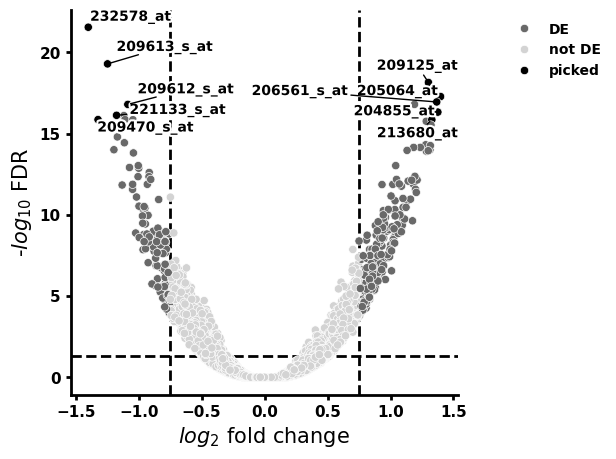

In [30]:
volcano(volcano_res, symbol='symbols')

<h1>Lasso regression</h1>

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()


In [34]:
binary_labels = labels
binary_labels['Sample_characteristics'] = le.fit_transform(binary_labels['Sample_characteristics'])
binary_labels

,Sample_characteristics
0,1
1,0
2,1
3,0
4,1
...,...
86,0
87,1
88,0
89,1


In [ ]:
data

In [35]:
X = data
y = binary_labels['Sample_characteristics']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
reg = linear_model.LassoCV(cv=10).fit(X, y)
coef = np.abs(reg.coef_)
important_genes = coef.argsort()[-100:][::-1]

In [37]:
expression_data_selected = data.iloc[:, important_genes]

<h1>Training mondel based on lasso feature selection</h1>

In [39]:
X = data[expression_data_selected.columns]
y = binary_labels['Sample_characteristics']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [42]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [43]:
y_train = y_train.astype(float)

In [44]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5614 - loss: 0.3126 - val_accuracy: 0.5333 - val_loss: 0.3014
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5965 - loss: 0.2546 - val_accuracy: 0.6000 - val_loss: 0.2516
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6491 - loss: 0.1987 - val_accuracy: 0.6000 - val_loss: 0.2029
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7544 - loss: 0.1480 - val_accuracy: 0.7333 - val_loss: 0.1571
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8947 - loss: 0.1057 - val_accuracy: 0.8667 - val_loss: 0.1168
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9649 - loss: 0.0739 - val_accuracy: 0.8667 - val_loss: 0.0843
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9649 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.0587
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0360 - val_accuracy: 1.0000 - val_loss: 0.

<Axes: >

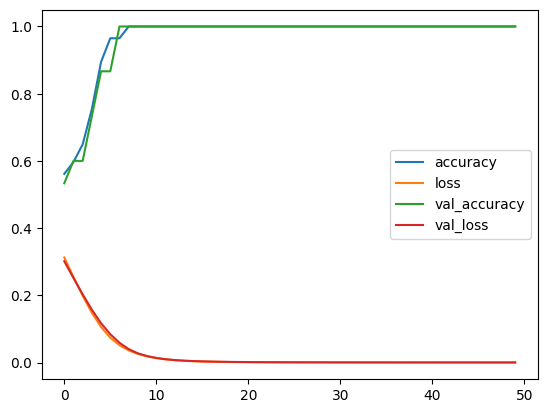

In [45]:
pd.DataFrame(model.history.history).plot()

In [63]:
test_data = pd.read_table('GSE27262_series_matrix.txt')

C:\Users\Debma\AppData\Local\Temp\ipykernel_11800\1911159394.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_table('GSE27262_series_matrix.txt')


In [65]:
test_data = test_data.set_index('ID_REF').rename_axis('Samples').T

In [69]:
test_data[expression_data_selected.columns]

Samples,219597_s_at,210548_at,219918_s_at,230560_at,230863_at,204580_at,201291_s_at,216623_x_at,1554768_a_at,218468_s_at,...,208839_s_at,208829_at,208833_s_at,208818_s_at,208823_s_at,208834_x_at,208832_at,208835_s_at,208548_at,208824_x_at
GSM673870,2.528905,1.482099,0.45847,3.518267,1.080825,0.49058926,0.34134522,0.177522,0.9888206,0.691645,...,0.948963,0.948082,1.013319,1.097323,0.843129,1.005863,1.161091,0.990471,0.86471,0.996476
GSM673871,0.396244,0.696897,1.022447,0.799044,0.833097,0.68496937,3.965426,1.821168,1.90937,28.973051,...,1.113809,0.747996,1.405261,1.00089,0.820259,0.954561,0.870706,1.374224,1.094265,1.229392
GSM673872,1.66973,1.542301,0.546624,7.757749,0.761515,1.0346977,0.4272258,0.809208,1.077259,0.757526,...,1.075986,0.935424,1.060857,1.158189,0.921679,1.003892,1.167542,0.950807,0.867794,0.789182
GSM673873,0.362883,0.817096,1.559878,0.120306,0.403685,22.315773,3.4187846,5.523542,1.6659524,29.679914,...,1.235086,1.017386,1.207325,1.232599,0.769315,1.007765,0.93806,0.937908,0.922105,1.127482
GSM673874,1.95296,0.928085,0.556765,4.448545,0.540904,0.60386544,0.62366813,0.188454,1.0111794,5.774437,...,1.012244,0.881416,0.856317,1.127263,0.95978,0.989948,1.220496,0.927894,1.032924,1.025153
GSM673875,0.309164,0.6466,1.405431,0.100317,0.3459,9.783459,2.4356062,2.429729,1.0714048,6.750988,...,0.6039,0.720211,0.872362,0.716507,0.885864,1.002615,0.960021,1.438695,1.007866,1.14569
GSM673876,1.915786,1.007938,0.400982,12.012412,1.530906,0.5337102,0.2980611,0.093499,0.7646769,0.650317,...,1.002145,0.963254,0.962406,1.209488,1.014785,1.040011,1.194354,1.255463,0.851709,0.80666
GSM673877,0.95633,0.992062,6.326793,0.800061,1.42481,30.399591,7.3643413,3.366834,4.791591,41.76379,...,1.23931,1.371133,0.891003,1.26283,1.101336,1.049843,0.69206,0.841934,0.878324,1.481248
GSM673878,1.626799,1.658831,0.451397,6.477058,1.27871,0.6542632,0.26062986,0.166484,0.79455274,0.616276,...,0.998076,0.881993,0.835211,1.036902,0.871436,1.00663,1.089949,0.880681,0.962912,0.73449
GSM673879,0.335386,0.545862,9.842681,0.090569,0.348688,11.149587,11.5018425,7.712206,2.5870895,11.017313,...,0.749235,0.89513,1.209915,0.69097,1.024898,1.094154,0.825607,1.120891,0.911712,1.449942


In [67]:
test_data['Sample_title'] = le.fit_transform(test_data['Sample_title'])

In [148]:
lasso_test_data = test_data[expression_data_selected.columns]
lasso_test_data_labels = test_data['Sample_title']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(lasso_test_data, lasso_test_data_labels, test_size=0.2, random_state=36)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
y_train = y_train.astype(float)

In [155]:
predicted_values = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [89]:
predicted_values.size

40

In [156]:
actual_values = y_test

In [86]:
import matplotlib.pyplot as plt

<h5>Predicting from Lasso Model with cv=10 and 2 hidden neural layers</h5>

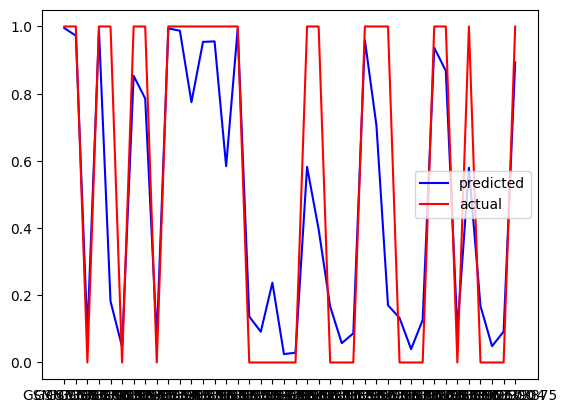

In [95]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

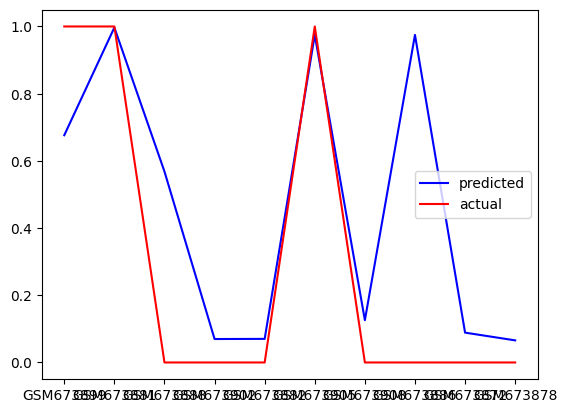

In [98]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

<h5>Predicting from Lasso Model with cv=10 and 2 hidden neural layers of different nuerons</h5>

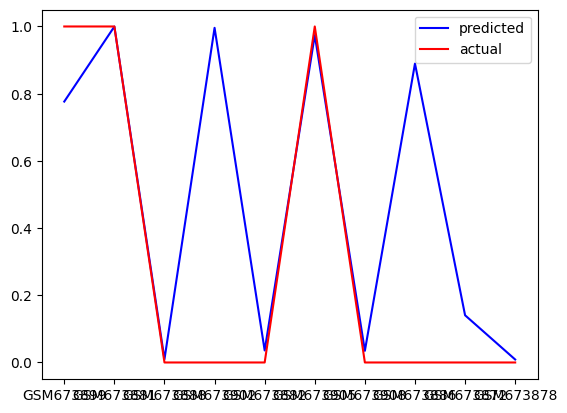

In [110]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

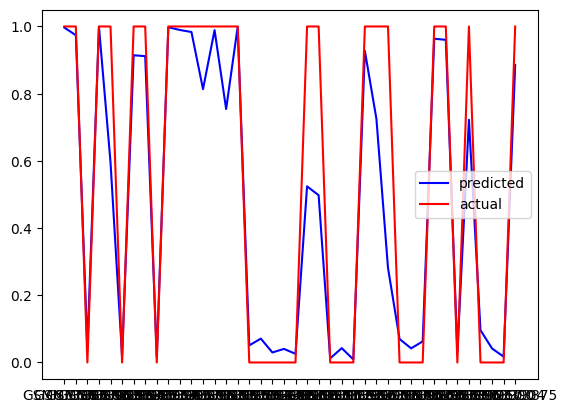

In [113]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

<h5>Predicting from Lasso Model with cv=10 and <b>ELU</b> activation function</h5>

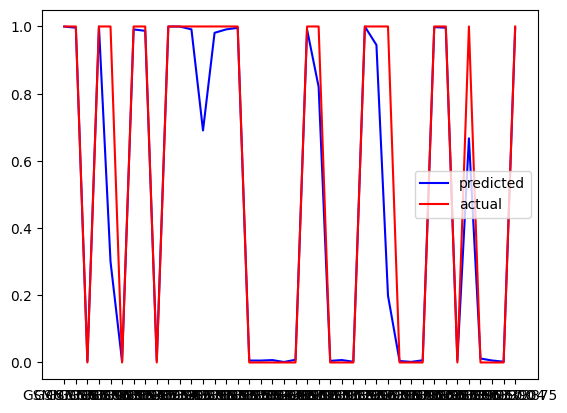

In [128]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

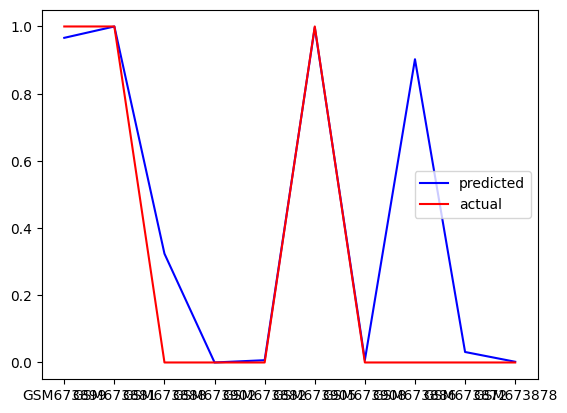

In [131]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

<h5>Predicting from Lasso Model with cv=5 and 2 hidden neural layers of different nuerons</h5>

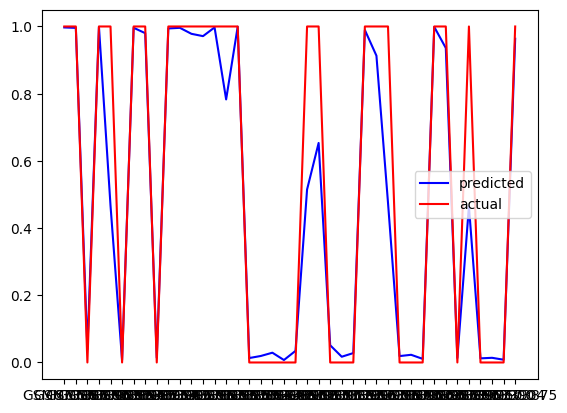

In [154]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

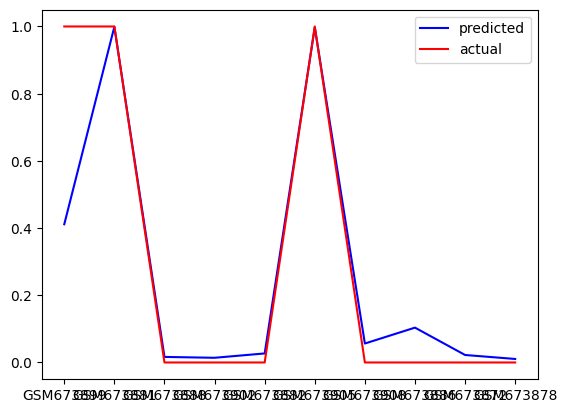

In [157]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

In [203]:
another_testing_data = pd.read_table('GSE19804_series_matrix.txt')

C:\Users\Debma\AppData\Local\Temp\ipykernel_11800\4173028007.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  another_testing_data = pd.read_table('GSE19804_series_matrix.txt')


In [208]:
another_testing_data

Samples,Sample_title,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM494556,1,11.9628,7.05652,6.55585,8.4385,3.73169,9.21781,5.65081,6.26584,9.24805,...,13.464,12.6812,14.1916,14.148,10.7601,9.25863,10.0312,3.53346,4.19381,3.93333
GSM494557,1,11.3878,7.33711,6.96023,8.51636,3.77978,8.68893,5.59373,5.72866,8.83435,...,13.4525,12.6319,14.222,14.1628,9.91016,7.87935,8.64451,3.49758,4.05828,3.84779
GSM494558,1,11.1928,7.26121,7.14488,8.43138,3.99853,9.53345,5.39758,5.69869,10.683,...,13.8558,13.209,14.4446,14.3672,12.2144,10.7865,11.5854,3.41274,4.14756,3.65014
GSM494559,1,11.9036,7.91211,7.13887,8.67404,3.69171,8.28728,5.87546,5.75049,8.85718,...,12.6257,11.7775,13.8921,13.7543,4.6904,4.78768,4.33814,3.581,4.09604,3.88341
GSM494560,1,11.7523,8.27448,7.72479,8.78145,3.93509,8.35532,5.76576,5.70967,8.68914,...,12.9077,12.0767,14.2298,14.0951,12.9607,8.0919,11.1912,3.63548,3.97614,4.0082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM494671,0,10.6012,7.9279,8.62987,8.59521,3.71172,8.8507,5.59213,7.61872,11.2623,...,12.2601,11.3878,13.6719,13.5537,9.57935,8.36116,9.03958,3.61715,4.33806,4.08592
GSM494672,0,11.1979,7.85849,7.88748,8.6634,3.84361,8.50367,5.60671,7.82058,10.3755,...,12.6053,11.7143,13.8235,13.7295,9.66382,8.60959,9.2435,3.58375,4.21639,4.08423
GSM494673,0,10.8432,7.91834,7.85222,8.33596,3.75038,8.58833,5.40873,6.94331,10.1925,...,11.9399,11.0618,13.2673,13.073,9.88711,8.91082,9.27416,3.57916,4.14785,4.04381
GSM494674,0,10.6067,8.05853,7.24397,8.66742,3.87179,8.6983,5.28012,7.4811,9.60454,...,11.8716,11.0045,13.4682,13.2873,10.2234,9.06334,9.65014,3.54081,4.0633,4.02226


In [205]:
another_testing_data = another_testing_data.set_index('ID_REF').rename_axis('Samples').T

In [207]:
another_testing_data['Sample_title'] = le.fit_transform(another_testing_data['Sample_title'])

In [211]:
lasso_another_test_data = another_testing_data[expression_data_selected.columns]
lasso_another_test_data_labels = another_testing_data['Sample_title']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(lasso_another_test_data, lasso_another_test_data_labels, test_size=0.2, random_state=36)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
y_train = y_train.astype(float)

In [214]:
from tensorflow.keras.models import load_model

In [215]:
loaded_model = load_model('Lung_Cancer_Model.keras')

C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [224]:
predicted_values = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


In [225]:
actual_values = y_test

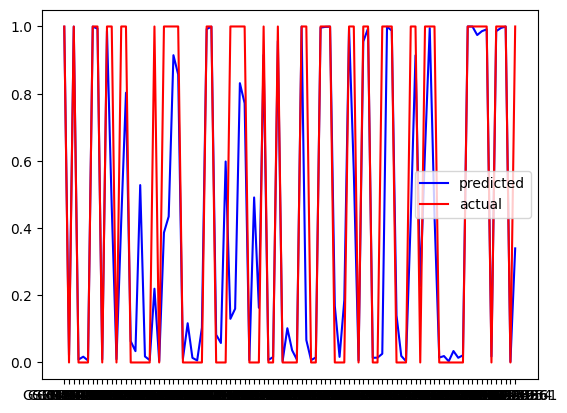

In [223]:
fig, ax = plt.subplots()


ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()

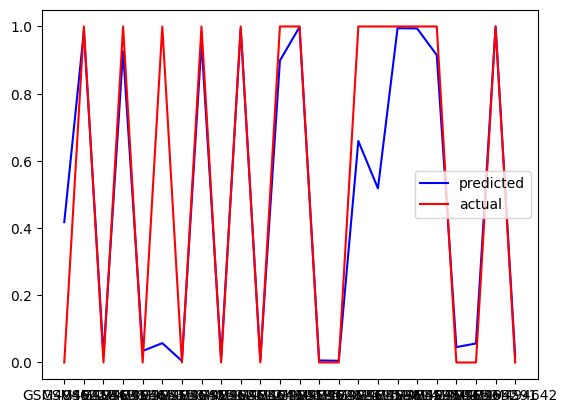

In [226]:
fig, ax = plt.subplots()

ax.plot(predicted_values, label='predicted', color='blue')
ax.plot(actual_values, label='actual', color='red')

ax.legend()

plt.show()